In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat 
import os
import glob

In [2]:
import pandas as pd
from tqdm.notebook import tqdm

> The gaze of each subject was tracked monocularly (best or preferred eye) as they viewed an iMac (Apple, Cupertino, CA), mid-2010, 2700
display (60 x 34 cm; 60Hz; 2560 by 1440 pixels; 16:9 aspect ratio) or a Barco F50 projector (Gamle Fredrikstad, Norway) and Stewart Filmscreen (Torrance, CA) Aeroview 70 rear-projection screen to create a 27”display (60 34 cm; 120 Hz; 1920 x 1080 pixels 16:9 aspect ratio) from 1 m away for a 3319
potential viewing area.

In [4]:
data_info = pd.read_csv("../30s_segment_description.csv")

In [5]:
data_info

,index,file name,movie name,ch,location in ch (min/frames),length,AR (approx),size,genre (IMDB),genre category,...,human figures (0-5),nature (0-5),man-made objects (0-5),environment,light (0-5),light category,aud. Info,possible question,possible answers,content elements
0,NaN,STEPF_3a,The Stepfather,3,00:33.03/792-01:03.05/1511,30.01s,21x9,853x360,mystery/thriller,a demo (drama/other),...,3,0,2,indoor,2,low,4,NaN,NaN,NaN
1,NaN,APPAL_7a,Appaloosa,7,00:01.70/41-00:31.73/761,30.03s,21x9,853x360,action/crime/drama (Western?),a demo (drama/other),...,4,3,0,outdoor,5,high,3,its hard to tell which characters are speaking...,NaN,NaN
2,NaN,STARD_2b,Stardust,2,04:05.52/5886-04:35.57/6607,30.04s,21x9,853x356,adventure/comedy/family (fantasy?),a demo (drama/other),...,3,3,2,outdoor,1,low,3,describe what the characters are doing,"candlelight picnic, candles on branches, champ...",NaN
3,1.0,Cloud_13a,Cloudy with a Chance of Meatballs,13,00:48.36/1160-01:18.38/1880,30.01s,16x9 (may be 1.77:1 to 1.85:1),853x480,animation/comedy/family,cartoon/animation,...,3,2,1,outdoor,4,high,3,describe the man's expressions and body langua...,NaN,NaN
4,2.0,Cloud_17a,Cloudy with a Chance of Meatballs,17,00:00.00/0-00:30.02/720,30.02s,16x9 (may be 1.77:1 to 1.85:1),853x480,animation/comedy/family,cartoon/animation,...,4,0,4,outdoor,4,high,3,describe the mayor,"extremely obese, white shirt, grey/blue jacket...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,202.0,BLUE_10a_POR,Blue Planet,10,00:00/00-00:30:00/922,30:00s,NaN,480x240,documentary,doc/nature,...,0,5,0,outdoor,4,high,4,NaN,NaN,NaN
205,203.0,NETW_7a_POR,Network,7,00:00/00-00:30:00/922,30:00s,NaN,480x240,drama/history,drama/other,...,5,0,5,indoor,3,medium,3,NaN,NaN,NaN
206,204.0,QUIZ_8a_POR,Quiz Show,8,00:00/00-00:29:00/893,29:00s,NaN,480x256,drama/history,drama/other,...,5,0,5,indoor,3,medium,3,NaN,NaN,NaN
207,205.0,SHAKE_11a_POR,Shakespeare in Love,11,00:00/00-00:30:00/910,30:00s,NaN,480x192,drama/romance,drama/other,...,4,3,1,outdoor,2,low,3,NaN,NaN,NaN


In [6]:
data_dir = "../preprocessed_data/gaze_pos_dist"

In [7]:
data_path = glob.glob(f"{data_dir}/*.npz")

In [8]:
data_path

['../preprocessed_data/gaze_pos_dist/SHAKE_16a.npz',
 '../preprocessed_data/gaze_pos_dist/MULAN_7a.npz',
 '../preprocessed_data/gaze_pos_dist/MISSP_3a.npz',
 '../preprocessed_data/gaze_pos_dist/MULAN_3a.npz',
 '../preprocessed_data/gaze_pos_dist/BURY_3a.npz',
 '../preprocessed_data/gaze_pos_dist/APPAL_18a.npz',
 '../preprocessed_data/gaze_pos_dist/MULAN_19a.npz',
 '../preprocessed_data/gaze_pos_dist/FOODI_4a.npz',
 '../preprocessed_data/gaze_pos_dist/MARCH_14a.npz',
 '../preprocessed_data/gaze_pos_dist/MICRO_12a.npz',
 '../preprocessed_data/gaze_pos_dist/OFFIC_24a.npz',
 '../preprocessed_data/gaze_pos_dist/HESJU_4a.npz',
 '../preprocessed_data/gaze_pos_dist/MICRO_11a.npz',
 '../preprocessed_data/gaze_pos_dist/APPAL_7b.npz',
 '../preprocessed_data/gaze_pos_dist/MARCH_18a.npz',
 '../preprocessed_data/gaze_pos_dist/FREED_16a.npz',
 '../preprocessed_data/gaze_pos_dist/DEEPB_13a.npz',
 '../preprocessed_data/gaze_pos_dist/APPAL_5a.npz',
 '../preprocessed_data/gaze_pos_dist/MICRO_3a.npz',
 '.

In [15]:
training_methods = ["dino", "supervised"] 
depth_list = [4, 8, 12]

In [32]:
dist_mat_dict = {}
for tm in training_methods:
    dist_mat_dict[tm] = {}
    for depth in depth_list:
        dist_mat_dict[tm][str(depth)] = 0

for path in tqdm(data_path):
    print(path)
    dist_dict = np.load(path, allow_pickle=True)
    for tm in training_methods:
        for depth in depth_list:
            dist_mat_dict[tm][str(depth)] += dist_dict[tm].item()[str(depth)]

  0%|          | 0/200 [00:00<?, ?it/s]

../preprocessed_data/gaze_pos_dist/SHAKE_16a.npz
../preprocessed_data/gaze_pos_dist/MULAN_7a.npz
../preprocessed_data/gaze_pos_dist/MISSP_3a.npz
../preprocessed_data/gaze_pos_dist/MULAN_3a.npz
../preprocessed_data/gaze_pos_dist/BURY_3a.npz
../preprocessed_data/gaze_pos_dist/APPAL_18a.npz
../preprocessed_data/gaze_pos_dist/MULAN_19a.npz
../preprocessed_data/gaze_pos_dist/FOODI_4a.npz
../preprocessed_data/gaze_pos_dist/MARCH_14a.npz
../preprocessed_data/gaze_pos_dist/MICRO_12a.npz
../preprocessed_data/gaze_pos_dist/OFFIC_24a.npz
../preprocessed_data/gaze_pos_dist/HESJU_4a.npz
../preprocessed_data/gaze_pos_dist/MICRO_11a.npz
../preprocessed_data/gaze_pos_dist/APPAL_7b.npz
../preprocessed_data/gaze_pos_dist/MARCH_18a.npz
../preprocessed_data/gaze_pos_dist/FREED_16a.npz
../preprocessed_data/gaze_pos_dist/DEEPB_13a.npz
../preprocessed_data/gaze_pos_dist/APPAL_5a.npz
../preprocessed_data/gaze_pos_dist/MICRO_3a.npz
../preprocessed_data/gaze_pos_dist/BATM_15a.npz
../preprocessed_data/gaze_pos_d

In [133]:
num_data = len(data_path)

In [127]:
num_subject

12

In [134]:
subj_mean_dist = 0
for path in tqdm(data_path):
    dist_dict = np.load(path, allow_pickle=True)
    num_subject = len(dist_dict["subjects"])
    subj_mean_dist += dist_dict["subjects"].sum() / (num_subject*(num_subject-1))
subj_mean_dist /= num_data

  0%|          | 0/200 [00:00<?, ?it/s]

In [40]:

for tm in training_methods:
    for depth in depth_list:
        dist_mat_dict[tm][str(depth)] /= num_data

In [135]:
subj_mean_dist

109.37364973176143

In [43]:
dist_mat_min.shape

(6, 12)

In [49]:
import seaborn as sns
import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [69]:
colors = ["Blues", "Greens"]

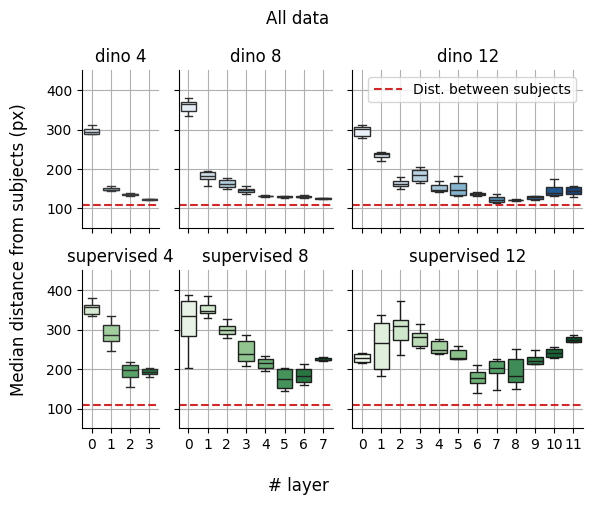

In [158]:
fig, axes = plt.subplots(2, 3, figsize=(6, 5), sharex='col', sharey='all', width_ratios=[1, 2, 3], tight_layout=True)
fig.suptitle("All data")
for i, tm in enumerate(training_methods):
    for j, depth in enumerate(depth_list):
        dist_mat = dist_mat_dict[tm][str(depth)]
        dist_mat_min = np.min(dist_mat, axis=2)

        df = pd.DataFrame(dist_mat_min)#, columns=np.array2string(np.arange(1, depth+1)))
        #sns.stripplot(data=df, jitter=True, linewidth=1, edgecolor='k', palette=colors[i], ax=axes[i, j])
        sns.boxplot(data=df,fliersize=0, palette=colors[i], ax=axes[i, j])
        axes[i, j].set_title(f"{tm} {depth}")
        axes[i, j].axhline(subj_mean_dist, linestyle="dashed", color="tab:red", label="Dist. between subjects")
        if i == 0 and j == 2:
            axes[i, j].legend()
        axes[i, j].set_ylim(50, 450)
        axes[i, j].grid()

fig.supxlabel("# layer")
fig.supylabel("Median distance from subjects (px)")
plt.savefig("hollywood_all_dist.png")
plt.show()

In [147]:
dist_mat_dict_genre = {}
video_num = {}
subj_mean_dist_genre = {}
for gen in genres:
    dist_mat_dict_genre[gen] = {}
    subj_mean_dist_genre[gen] = 0
    video_num[gen] = 0
    for tm in training_methods:
        dist_mat_dict_genre[gen][tm] = {}
        for depth in depth_list:
            dist_mat_dict_genre[gen][tm][str(depth)] = 0

In [104]:
dist_mat_dict_genre 

{'cartoon/animation': {'dino': {'4': 0, '8': 0, '12': 0},
  'supervised': {'4': 0, '8': 0, '12': 0}},
 'doc/nature': {'dino': {'4': 0, '8': 0, '12': 0},
  'supervised': {'4': 0, '8': 0, '12': 0}},
 'drama/other': {'dino': {'4': 0, '8': 0, '12': 0},
  'supervised': {'4': 0, '8': 0, '12': 0}}}

In [148]:
for filepath in tqdm(data_path):
    video_name = os.path.splitext(os.path.basename(filepath))[0]
    gen = data_info[data_info["file name"] == video_name]["genre category"].item()
    video_num[gen] += 1
    dist_dict = np.load(filepath, allow_pickle=True)
    num_subject = len(dist_dict["subjects"])
    subj_mean_dist_genre[gen] += dist_dict["subjects"].sum() / (num_subject*(num_subject-1))
    for tm in training_methods:
        for depth in depth_list:
            dist_mat_dict_genre[gen][tm][str(depth)] += dist_dict[tm].item()[str(depth)]

  0%|          | 0/200 [00:00<?, ?it/s]

In [149]:
for gen in genres:
    subj_mean_dist_genre[gen] /= video_num[gen]
    for tm in training_methods:
        for depth in depth_list:
            dist_mat_dict_genre[gen][tm][str(depth)] /= video_num[gen]

In [150]:
subj_mean_dist_genre

{'cartoon/animation': 100.40894936828775,
 'doc/nature': 129.74675486935584,
 'drama/other': 105.57084814038772}

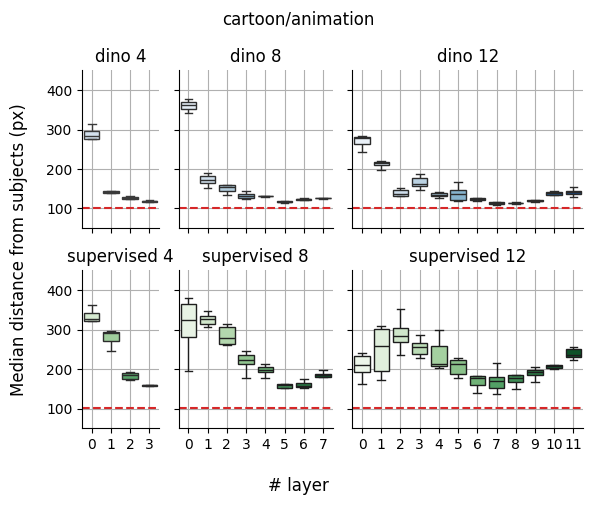

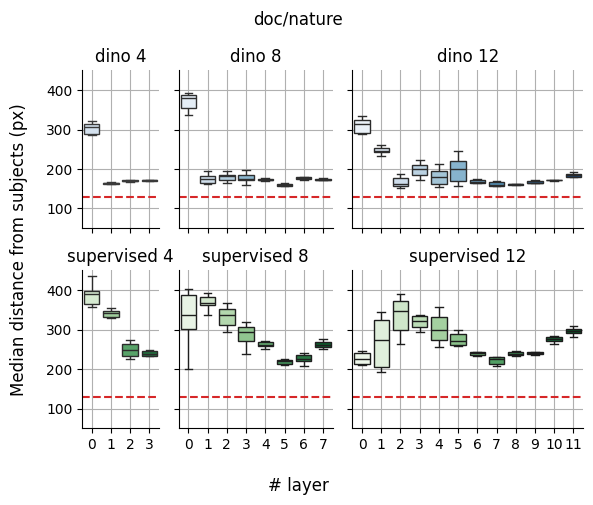

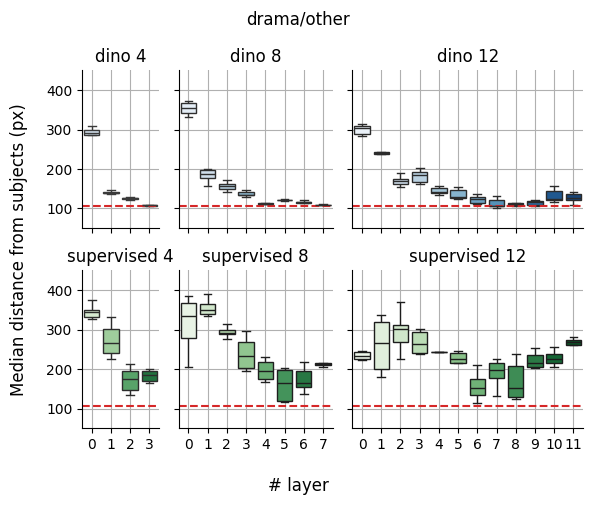

In [160]:
for gen in genres:
    fig, axes = plt.subplots(2, 3, figsize=(6, 5), sharex='col', sharey='all', width_ratios=[1, 2, 3], tight_layout=True)
    fig.suptitle(gen)
    for i, tm in enumerate(training_methods):
        for j, depth in enumerate(depth_list):
            dist_mat = dist_mat_dict_genre[gen][tm][str(depth)]
            dist_mat_min = np.min(dist_mat, axis=2)
    
            df = pd.DataFrame(dist_mat_min)#, columns=np.array2string(np.arange(1, depth+1)))
            #sns.stripplot(data=df, jitter=True, linewidth=1, edgecolor='k', palette=colors[i], ax=axes[i, j])
            sns.boxplot(data=df,fliersize=0, palette=colors[i], ax=axes[i, j])
            axes[i, j].set_title(f"{tm} {depth}")
            axes[i, j].set_ylim(50, 450)
            axes[i, j].grid()
            axes[i, j].axhline(subj_mean_dist_genre[gen], linestyle="dashed", color="tab:red")
    
    fig.supxlabel("# layer")
    fig.supylabel("Median distance from subjects (px)")
    plt.savefig(f"hollywood_{gen[:3]}.png")
    plt.show()

In [ ]:
df

In [ ]:
"""
plt.scatter(xr, yr)
plt.axvline(0, linestyle="dashed", color="gray")
plt.axvline(width, linestyle="dashed", color="gray")
plt.axhline(0, linestyle="dashed", color="gray")
plt.axhline(height, linestyle="dashed", color="gray")
"""

In [ ]:
mp.shape

In [ ]:
plt.scatter(mp[0, -1, 4, :, 0], mp[0, -1, 4, :, 1])
plt.axvline(0, linestyle="dashed", color="gray")
plt.axvline(width, linestyle="dashed", color="gray")
plt.axhline(0, linestyle="dashed", color="gray")
plt.axhline(height, linestyle="dashed", color="gray")

In [ ]:
np.sum(frame_flag)

In [ ]:
yr[frame_flag]

In [ ]:
plt.scatter(x, y)

In [ ]:
movie_info.files

In [ ]:
num_frames * fps

In [ ]:
duration * fps

In [ ]:
np.arange(num_frames) / fps * 1e3

In [ ]:
num_frames[m_idx] / fps[m_idx]

In [ ]:
num_frames[m_idx] / 30

In [ ]:
gaze_file_path

In [ ]:
mat = loadmat(files[1])

In [ ]:
mat

In [ ]:
mat["movieFileName"]

In [ ]:
x.max()

In [ ]:
t = eyetrackRecord["t"][0, 0][0]
print(t-t[0])

In [ ]:
t.shape

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
missing = eyetrackRecord["missing"][0, 0][0]
idx = missing == 0

In [ ]:
x[idx].shape

In [ ]:
plt.scatter(x[idx], y[idx])

動画ごとに視点データを集める．動画ごとにファイル名を保存したリストをtxtで作成する．

In [ ]:
video_number = np.loadtxt(dirname + "/" + dirs[i] + "_videos.txt", dtype=int)

In [ ]:
video_number

In [ ]:
filename_list = [list() for _ in range(206)]

In [ ]:
for j in range(len(files)):
    filename_list[video_number[j]].append(files[j])

In [ ]:
filename_list